### SHAP

In [1]:
%matplotlib inline
from fastai.tabular.all import *

In [2]:
path = Path('C:/Users/light/Documents/Fastbook/Personal-Machine-Learning-Data/Walkwithfastai Data')
df = pd.read_csv(path/'6 class csv.csv')

In [3]:
cat_names = ['Star color', 'Spectral Class']
cont_names = ['Temperature (K)','Luminosity(L/Lo)','Radius(R/Ro)','Absolute magnitude(Mv)']
procs = [Categorify, FillMissing, Normalize]
y_names = 'Star type'
y_block = CategoryBlock()
splits = IndexSplitter(list(range(80,100)))(range_of(df))

In [4]:
to = TabularPandas(df, procs, cat_names, cont_names, y_names, y_block, splits)
dls = to.dataloaders()

In [5]:
learn = tabular_learner(dls, layers=[200,100],metrics=accuracy)
learn.fit(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.253500,1.725546,0.100000,00:01
1,0.906464,1.682185,0.150000,00:00
2,0.734227,1.610117,0.400000,00:00
3,0.613787,1.511480,0.600000,00:00
4,0.539917,1.387098,0.700000,00:00
5,0.481184,1.244920,0.750000,00:00
6,0.429008,1.093764,0.750000,00:00
7,0.386957,0.937473,0.750000,00:00
8,0.351759,0.794658,0.800000,00:00
9,0.326821,0.662754,0.900000,00:00


In [6]:
from fastinference.tabular import *

In [7]:
exp = ShapInterpretation(learn, df.iloc[:100])

  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
df.iloc[10]

Temperature (K)             3600
Luminosity(L/Lo)          0.0029
Radius(R/Ro)                0.51
Absolute magnitude(Mv)     10.69
Star type                      1
Star color                   Red
Spectral Class                 M
Name: 10, dtype: object

Classification model detected, displaying score for the class 0.
(use `class_id` to specify another class)
Displaying row 10 of 100 (use `row_idx` to specify another row)


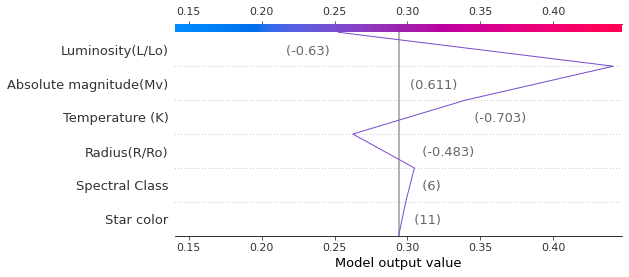

In [9]:
exp.decision_plot(class_id=0, row_idx=10)

Classification model detected, displaying score for the class 1.
(use `class_id` to specify another class)
Displaying row 10 of 100 (use `row_idx` to specify another row)


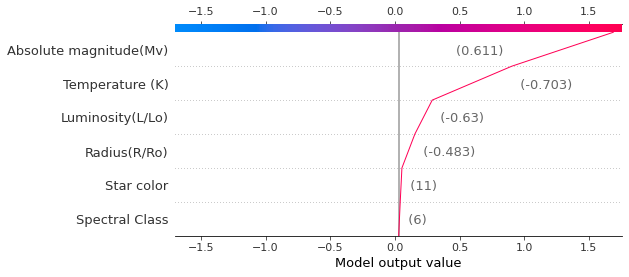

In [10]:
exp.decision_plot(class_id=1, row_idx=10)

Classification model detected, displaying score for the class 0.
(use `class_id` to specify another class)


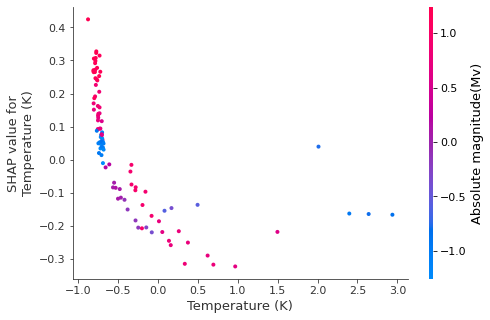

In [12]:
exp.dependence_plot('Temperature (K)', class_id=0)

Classification model detected, displaying score for the class 1.
(use `class_id` to specify another class)


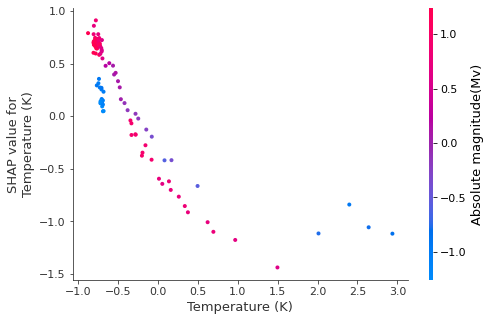

In [13]:
exp.dependence_plot('Temperature (K)', class_id=1)

In [14]:
exp.force_plot(class_id=1)

Classification model detected, displaying score for the class 1.
(use `class_id` to specify another class)


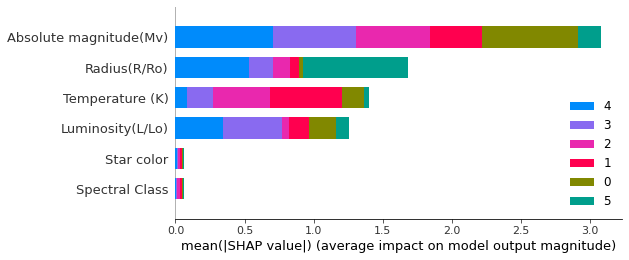

In [15]:
exp.summary_plot()

Classification model detected, displaying score for the class 4.
(use `class_id` to specify another class)
Displaying row 10 of 100 (use `row_idx` to specify another row)


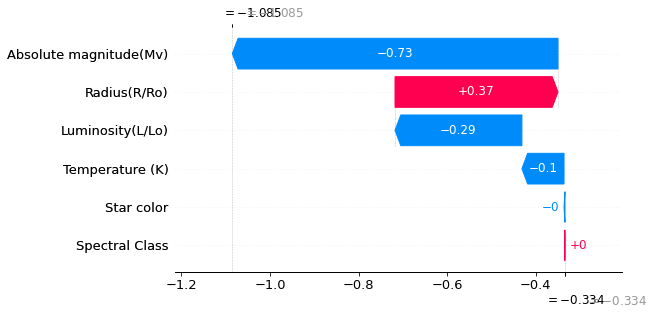

In [17]:
exp.waterfall_plot(row_idx=10, class_id=4)

### ClassConfusion

In [18]:
from fastinference.class_confusion import *

ImportError: Requires to be run in Google Colaboratory